#### General imports

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

In [2]:
%store -r pokemon_df

In [3]:
pokemon_df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


In [5]:
pokemon_source = ColumnDataSource(pokemon_df)
output_notebook()

Loading BokehJS ...

#### Excercise 7.1: Draw a box plot

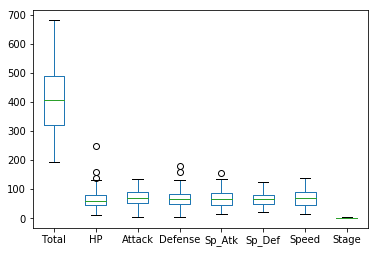

In [6]:
pokemon_df.plot(kind = 'box')

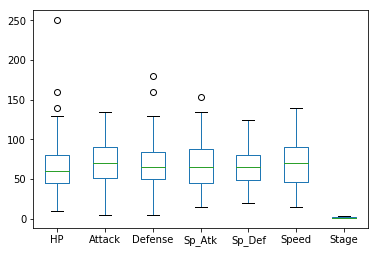

In [8]:
pokemon_df.drop('Total', axis=1).plot(kind = 'box')

In [10]:
pokemon_df[pokemon_df.HP> 130]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,2,False
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False


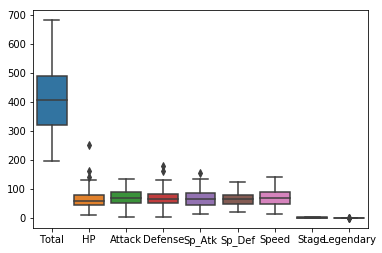

In [13]:
sns.boxplot(data=pokemon_df)

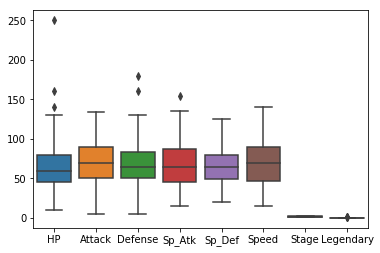

In [14]:
sns.boxplot(data=pokemon_df.drop('Total', axis=1))

#### Bokeh example

In [15]:

# generate some synthetic time series for six different categories
cats = list("abcdef")
yy = np.random.randn(2000)
g = np.random.choice(cats, 2000)
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))

# find the quartiles and IQR for each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for keys in out.index:
        outx.append(keys[0])
        outy.append(out.loc[keys[0]].loc[keys[1]])

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]

# stems
p.segment(cats, upper.score, cats, q3.score, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_color="black")

# boxes
p.vbar(cats, 0.7, q2.score, q3.score, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.score, q2.score, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"

output_file("boxplot.html", title="boxplot.py example")

show(p)

#### Excercise 7.2: Draw a box plot for Sp_Atk, Sp_Def in matplotlib and sns

In [ ]:
sns.boxplot(data=pokemon_df[['Attack', 'Defense']])

In [ ]:
pokemon_df[['Attack', 'Defense']].plot(kind = 'box')